第11回の演習です。MNISTデータセットを使って、機械学習の分類手法の性能を比較します。でも、その前にモデル評価とモデル選択について説明しておきます。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 11")

Chapter 11


# モデルの評価
前回、決定木を導入し、手書き文字のMNISTデータセットに対して識別率（正確度）を求めました。このとき、MNISTデータセットの全データを、決定木モデルを作るための学習用データと、決定木モデルを検証するための検証用データの2つに分けました。しかし、このやり方だと、モデルを作るためにすべてのデータを用いていないわけで、データの特徴が完全には反映されません。モデルの検証でも同様のことが言えます。そこで、交差確認法を適用します。sklearnライブラリにはmodel_selectionモジュールがあり、交差確認法のクラスcross_val_scoreが備えられています。

In [ ]:
# 決定木
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# digitsをロード
digits = datasets.load_digits()

# 決定木モデルを作る
model = DecisionTreeClassifier(criterion = "gini", max_depth = 9)

## 交差確認法
cross_val_scoreは主な引数として（モデル, 学習データ, ラベル, 評価指標, 分割数）を持ちます。


In [ ]:
# 交差確認法
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, digits.data, digits.target, scoring = "accuracy", cv = 10)

# 決定木のモデルで分類
print("Each Score : ", score)
print("Average : ", score.mean())

Each Score :  [0.8        0.85       0.82777778 0.76666667 0.76666667 0.88333333
 0.86666667 0.8547486  0.81005587 0.83240223]
Average :  0.8258317815021726


上の例では"cv = 10"に設定し、MNISTデータセット全体を10個に分割します。多くのデータを学習用に使えるので、決定木のモデルの精度が上がるのか、識別率は約82%となっています。

# モデルの選択
scikit-learnのtreeモジュールのDecisionTreeClassifierクラスを利用したとき、その引数として不純度の指標と決定木の深さを指定しました。モデルを作るために予め与えるパラメータは、ハイパーパラメータといいます。前回はこれらの引数（ハイパーパラメータ）を決め打ちで入力しましたが、本来、識別率（正確度）などの評価指標に基づいて決めるべきでしょう。モデルの選択について考えます。

## グリッドサーチ
グリッドサーチは、モデルに対して指定したハイパーパラメータをすべて組み合わせる手法です。つまり、パラメータの値を総当たりで調べるということです。model_selectionモジュールにはGridSearchCVクラスが備えられています。引数は（モデル, パラメータの種類, 評価指標, 分割数）です。

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# パラメータの種類
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9]
}

gscv = GridSearchCV(DecisionTreeClassifier(), params, scoring = "accuracy", cv = 10)
gscv.fit(digits.data, digits.target)

print("ベストスコア", gscv.best_score_)
print("最適パラメータ", gscv.best_params_)

ベストスコア 0.8252731222842955
最適パラメータ {'criterion': 'gini', 'max_depth': 9}


「モデルの評価」で算出された結果と同じような値になっています。このハイパーパラメータの中では最適なものを選択していたということですね。

# 分類手法の比較
機械学習の分類手法を比較します。使用するデータセットはMNISTです。比較対象は決定木、ランダムフォレスト、SVM（サポートベクトルマシン）です。まず、ぞれぞれの手法を見ていき、最後に分類結果を比較することにします。決定木は上でやりましたので、同じやり方でランダムフォレストとSVMを導入します。

## ランダムフォレスト
ランダムフォレストは、多数の決定木の集合（アンサンブル）を用いることによって分類精度を改善します。それぞれの決定木を作るときは、枝に分岐する特徴量（説明変数）をランダムに選択します。ランダムに選択すれば分類精度の悪い決定木ができることが多いのですが、多数作っておけば、どれかが最適になるだろうと考えているのです。ensembleモジュールにRandomForestClassifierというクラスが用意されています。ここでは、以下のハイパーパラメータを設定します。
- n_estimators: 決定木の数を指定します。基本的に数が多いほど良くなります。ただ、処理に時間がかかります。
- max_features: 個々の決定木で、いくつの特徴量（説明変数）を使用するかを指定します。( 1, "auto"：すべての説明変数の数の2乗根, None：すべての説明変数の数 )
- max_depth: 個々の決定木で、木の深さをどこまでにするかを指定します。基本的に、深くするほど複雑な分布に対応できます。ただ、過学習を起こしやすくなります。

In [ ]:
# Random Forest（実行には2分くらいかかります）
from sklearn.ensemble import RandomForestClassifier

# Support Vector Classifier
model = RandomForestClassifier()
# パラメータの種類
params = {
    "n_estimators": [30, 50, 100],        # 用意する決定木モデルの数
    "max_features": [1, "auto", None],    # ランダムに指定する特徴量の数
    "max_depth":    [10, 20, 30],         # 決定木のノード深さの制限値
}

rfcCV = GridSearchCV(model, params, scoring = "accuracy", cv = 10)
rfcCV.fit(digits.data, digits.target)
print("ベストスコア", rfcCV.best_score_)
print("最適パラメータ", rfcCV.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

ベストスコア 0.9493513345747981
最適パラメータ {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


## SVM
SVMは、クラスの間のマージンを最大化することで決定境界を算出し、データをクラスに識別する手法です。SVMではカーネル関数を使って、データを高次元の特徴空間へ写像した上で、クラスに識別していきます。sklearnライブラリには、svmモジュールにSVCというクラスが用意されています。ここでは、以下のパラメータを指定します。
- C：損失関数の損失の強さを指定します。損失というのは、正しく識別されたら損失ゼロ、正しく識別されても境界面に近ければ少しの損失、誤って識別されたら大きな損失です。この値が小さいと誤りを許容し、大きいと誤りを許容しなくなります。
- kernel：カーネル関数を指定します。(linear：線形、poly：多項式、rbf：ガウス関数、sigmoid：シグモイド)
- gamma：学習データの位置を中心とした分布の広がり具合を指定します。値が小さいと緩やかな分布となり、学習データからずれていてもよいです。値が大きいと鋭い分布となり、学習データの位置に合わせようとします。

In [ ]:
# SVC
from sklearn.svm import SVC

# Support Vector Classifier
model = SVC()
# パラメータの種類
params = [
    {"C": [1, 10, 100, 1000], "kernel": ["linear"]},
    {"C": [1, 10, 100, 1000], "kernel": ["rbf"], "gamma": [0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel": ["poly"], "degree": [2, 3, 4], "gamma": [0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel": ["sigmoid"], "gamma": [0.001, 0.0001]}
    ]

svcCV = GridSearchCV(model, params, scoring = "accuracy", cv = 10)
svcCV.fit(digits.data, digits.target)
print("ベストスコア", svcCV.best_score_)
print("最適パラメータ", svcCV.best_params_)

ベストスコア 0.9810738671632526
最適パラメータ {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


## ニューラルネットワーク
scikit-learnライブラリにもニューラルネットワークのアルゴリズムが多層パーセプトロンとして用意されています。MLPClassifierという関数です。主な引数として以下があります。
- hidden_layer_sizes：中間層のユニットの数を指定します。
- activation：活性化関数を指定します。"relu"や"logistic",  "tanh"を指定します。
- solver：重みの最適化手法を指定します。"sgd"や"adam"を指定します。

In [ ]:
# Neural Network（実行には10分くらいかかります）
from sklearn.neural_network import MLPClassifier

# Support Vector Classifier
model = MLPClassifier(max_iter = 10000)         # max_iter: 繰り返しの最大回数

# パラメータの種類
params = {
    "hidden_layer_sizes": [10, 50, 100],        # 中間層のユニットの数
    "activation": ["relu", "logistic"],         # 活性化関数
    "solver": ["adam", "sgd"]                   # 重みの最適化手法
}

mlpCV = GridSearchCV(model, params, scoring = "accuracy", cv = 10)
mlpCV.fit(digits.data, digits.target)
print("ベストスコア", mlpCV.best_score_)
print("最適パラメータ", mlpCV.best_params_)

ベストスコア 0.9554593420235878
最適パラメータ {'activation': 'logistic', 'hidden_layer_sizes': 100, 'solver': 'adam'}


これまでの結果を整理しておきましょう。

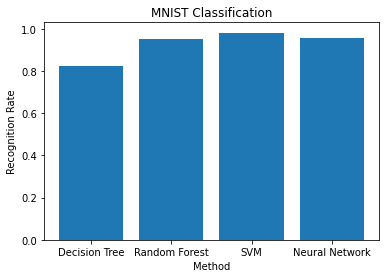

In [ ]:
# 決定木単体、ランダムフォレスト、SVMの比較
import numpy as np
import matplotlib.pyplot as plt

x = np.array(["Decision Tree", "Random Forest", "SVM", "Neural Network"])
y = np.array([gscv.best_score_, rfcCV.best_score_, svcCV.best_score_,  mlpCV.best_score_])

plt.bar(x, y)
plt.title("MNIST Classification")
plt.xlabel("Method")
plt.ylabel("Recognition Rate")
plt.show()